<a href="https://colab.research.google.com/github/valebl/advanced_programming_2020/blob/master/Declustering_catalog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
from sklearn.cluster import DBSCAN
%config InlineBackend.figure_format = 'svg'

import seaborn as sns

In [ ]:
write_csv = False

filepath = "/content/drive/MyDrive/SeismicSources/CPTI15_v3.0.xlsx"
df = pd.read_excel(filepath,sheet_name="catalogue",usecols="C,I,L,M,Q,N",engine="openpyxl")
df = df[['LatDef','LonDef','MwDef','Year','DepDef']]
#df = df.dropna(axis=0,how='any')
print(df.head(10))

# Write the dataframe object into csv file
if write_csv:
    df.to_csv ("CPTI15_v3.0.csv", header=True)


   LatDef  LonDef  MwDef  Year  DepDef
0  43.464  11.882   4.86  1005     NaN
1  41.488  13.831   5.10  1005     NaN
2  41.131  14.778   4.63  1019     NaN
3  41.131  14.778   4.63  1044     NaN
4     NaN     NaN    NaN  1046     NaN
5  45.539  10.220   5.10  1065     NaN
6     NaN     NaN    NaN  1065     NaN
7  41.129  16.869   4.86  1087     NaN
8  41.899  12.477   5.10  1091     NaN
9  41.131  14.778   4.63  1094     NaN


In [ ]:
filepath_UTM32N = "/content/drive/MyDrive/SeismicSources/CPTI15_v3.0_UTM32N.xlsx"
df_UTM = pd.read_excel(filepath_UTM32N,sheet_name="catalogue",usecols="C,I,L,M,Q,N",engine="openpyxl")
df_UTM = df_UTM[['X','Y','MwDef','Year','DepDef']]
#df_UTM = df_UTM.dropna(axis=0,how='any')
print(df_UTM.head(10))

              X             Y  MwDef  Year  DepDef
0  7.331372e+05  4.816379e+06   4.86  1005     NaN
1  9.033421e+05  4.604211e+06   5.10  1005     NaN
2  9.850866e+05  4.569418e+06   4.63  1019     NaN
3  9.850866e+05  4.569418e+06   4.63  1044     NaN
4  0.000000e+00  0.000000e+00    NaN  1046     NaN
5  5.952487e+05  5.043553e+06   5.10  1065     NaN
6  0.000000e+00  0.000000e+00    NaN  1065     NaN
7  1.160782e+06  4.583025e+06   4.86  1087     NaN
8  7.884312e+05  4.644411e+06   5.10  1091     NaN
9  9.850866e+05  4.569418e+06   4.63  1094     NaN


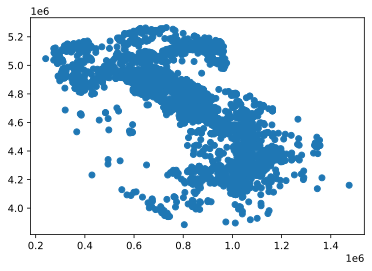

In [ ]:
df_UTM[['X','Y']] = df_UTM[['X','Y']].replace(['0', 0], np.nan)
plt.scatter(df_UTM['X'],df_UTM['Y'])

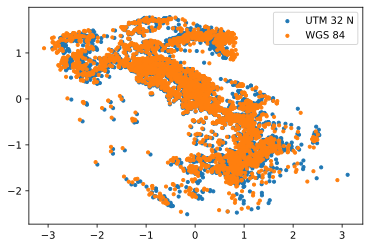

In [ ]:
m = df_UTM.mean()
std = df_UTM.std()
df_norm_UTM = (df_UTM-m)/std

plt.scatter(df_norm_UTM['X'],df_norm_UTM['Y'],  s=10, label='UTM 32 N')

m = df.mean()
std = df.std()
df_norm = (df-m)/std

plt.scatter(df_norm['LonDef'],df_norm['LatDef'], s=10, label='WGS 84')
plt.legend()

In [ ]:
filepath_ita = "/content/drive/MyDrive/SeismicSources/CPTI15_v3.0_UTM_Italy.xlsx"
df_ita = pd.read_excel(filepath_ita,sheet_name="catalogue",usecols="C,I,L,M,Q,N",engine="openpyxl")
df_ita = df_ita[['X','Y','MwDef','Year','DepDef']]
#df_ita = df_ita.dropna(axis=0,how='any')
print(df_ita.head(10))

              X             Y  MwDef  Year  DepDef
0  6.990465e+06  4.807054e+06   4.86  1005     NaN
1  7.152684e+06  4.589494e+06   5.10  1005     NaN
2  7.232927e+06  4.552005e+06   4.63  1019     NaN
3  7.232927e+06  4.552005e+06   4.63  1044     NaN
4  0.000000e+00  0.000000e+00    NaN  1046     NaN
5  6.861184e+06  5.038819e+06   5.10  1065     NaN
6  0.000000e+00  0.000000e+00    NaN  1065     NaN
7  7.408308e+06  4.559493e+06   4.86  1087     NaN
8  7.039523e+06  4.633568e+06   5.10  1091     NaN
9  7.232927e+06  4.552005e+06   4.63  1094     NaN


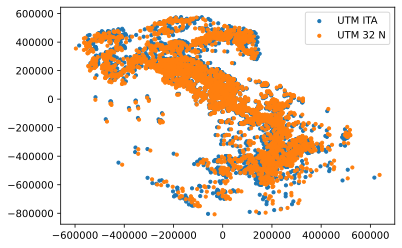

In [ ]:
df_ita[['X','Y']] = df_ita[['X','Y']].replace(['0', 0], np.nan)

m = df_ita.mean()
std = df_ita.std()
df_norm_ita = df_ita-m

df_norm_UTM = df_UTM - df_UTM.mean()

plt.scatter(df_norm_ita['X'],df_norm_ita['Y'],  s=10, label='UTM ITA')
plt.scatter(df_norm_UTM['X'],df_norm_UTM['Y'],  s=10, label='UTM 32 N')
plt.legend()

In [ ]:
len(df['LatDef'])

4860

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df.isnull(), cbar=False)


In [ ]:
df = df_UTM

df = df[['MwDef', 'X', 'Y']]
df = df.dropna(axis=0,how='any')

# Normalize df
m = df.mean()
std = df.std()
df_norm = (df-m)/std


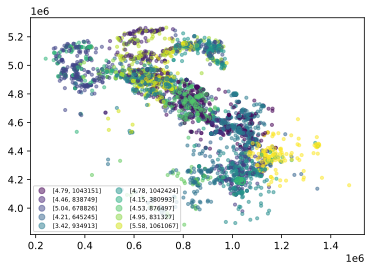

In [ ]:
#----------
# K-MEANS
#----------

features = ['MwDef', 'X', 'Y']
#features = ['MwDef','LatDef','LonDef']

kmeans = KMeans(n_clusters=30).fit(df_norm[features])
cluster_centers = kmeans.cluster_centers_

i = 0
for f in features:
    cluster_centers[:,i] = cluster_centers[:,i]*std[f]+m[f]
    i += 1

centroids = [f'[{mag:.2f}, {int(year)}]' for mag, year, *rest in cluster_centers]
# centroids = [f'[{mag:.2f}]' for mag, *rest in cluster_centers]

# scatter = plt.scatter(df['LonDef'], df['LatDef'], c= kmeans.labels_.astype(float), s=10, alpha=0.5)
scatter = plt.scatter(df['X'], df['Y'], c= kmeans.labels_.astype(float), s=10, alpha=0.5)
plt.legend(handles=scatter.legend_elements()[0], labels=centroids, loc='best', prop={'size': 6}, ncol=2)
#plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=10)
plt.show()

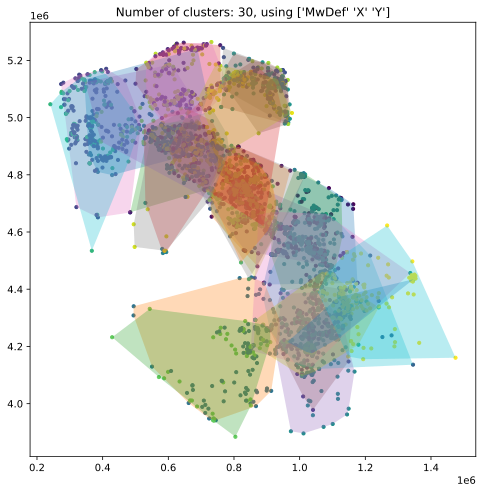

In [ ]:
from scipy.spatial import ConvexHull

clusts = kmeans.labels_.astype(float)

fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
#plt.scatter(df[['LonDef']], df[['LatDef']], c=kmeans.labels_.astype(float), cmap=plt.cm.viridis, alpha=1,s=10)
plt.scatter(df[['X']], df[['Y']], c=kmeans.labels_.astype(float), cmap=plt.cm.viridis, alpha=1,s=10)
# plot centers
# plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
# draw enclosure
for i in np.unique(kmeans.labels_.astype(float)):
    points = df[kmeans.labels_.astype(float) == i][['X','Y']].values
    # points = df[kmeans.labels_.astype(float) == i][['LonDef','LatDef']].values
    # get convex hull
    if len(points) > 2:
      hull = ConvexHull(points)
      # get x and y coordinates
      # repeat last point to close the polygon
      x_hull = np.append(points[hull.vertices,0],
                        points[hull.vertices,0][0])
      y_hull = np.append(points[hull.vertices,1],
                        points[hull.vertices,1][0])
      # plot shape
      plt.fill(x_hull, y_hull, alpha=0.3)

plt.title(f'Number of clusters: {len(np.unique(clusts))}, using {df_norm[features].columns.values}')
plt.show()


In [ ]:
data = df[['Year','MwDef']]
data = data.dropna(axis=0,how='any')

In [ ]:
print(data)
data.to_csv ("/content/drive/MyDrive/SeismicSources/data_matlab.csv", header=True)

      Year  MwDef
2212  1918   4.62
2307  1924   5.16
2373  1928   5.71
2521  1936   4.94
2617  1946   4.13
...    ...    ...
4855  2019   3.08
4856  2019   4.00
4857  2019   4.69
4858  2019   4.13
4859  2019   3.84

[1647 rows x 2 columns]
